In [0]:
from google.colab import files
import matplotlib.pyplot as plt
from scipy.linalg import circulant
import numpy as np
import time
#from mnist import load_dataset

from google.colab import drive

import imageio

In [2]:

!wget https://raw.githubusercontent.com/yandexdataschool/Practical_DL/35c067adcc1ab364c8803830cdb34d0d50eea37e/week01_backprop/mnist.py -O mnist.py

--2020-04-01 23:13:41--  https://raw.githubusercontent.com/yandexdataschool/Practical_DL/35c067adcc1ab364c8803830cdb34d0d50eea37e/week01_backprop/mnist.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2697 (2.6K) [text/plain]
Saving to: ‘mnist.py’

mnist.py            100%[===================>]   2.63K  --.-KB/s    in 0s      

2020-04-01 23:13:41 (36.9 MB/s) - ‘mnist.py’ saved [2697/2697]



In [0]:
import mnist

In [4]:
X_train, y_train, X_val, y_val, X_test, y_test = mnist.load_dataset(flatten=True)

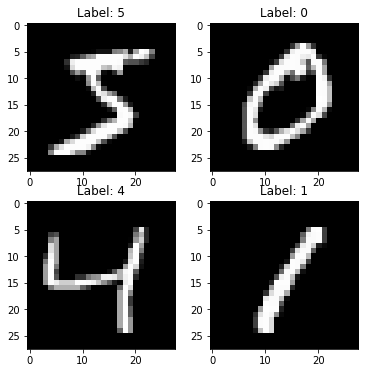

In [5]:
plt.figure(figsize=[6,6])
for i in range(4):
    plt.subplot(2,2,i+1)
    plt.title("Label: %i"%y_train[i])
    plt.imshow(X_train[i].reshape([28,28]),cmap='gray');
    

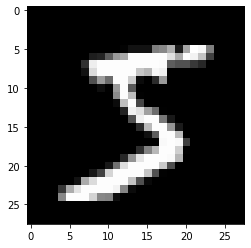

In [6]:
pic1 = X_train[0].reshape([28,28])
plt.imshow(pic1, 'gray')

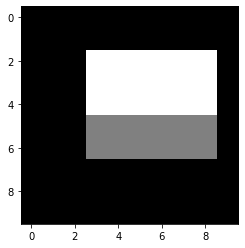

In [0]:
pic1 = np.zeros((10,10))
pic1[2:7,3:9] = 1

pic1[5:7, 3:9] = 0.5
plt.imshow(pic1,'gray')

In [0]:
K = 100
L = 784
N = 784

In [0]:

m1 = pic1.reshape((N,1))

In [0]:
C = np.random.randn(L,N)


h1 = np.random.randn(K,1)
h2 = np.random.randn(K,1)

B = np.random.randn(L,K)

In [32]:
A = circulant(C[:,0]) @ B
for iter in range(1,N):
    elem = circulant(C[:,iter]) @ B
    A = np.hstack((A,elem))

KeyboardInterrupt: ignored

In [0]:
X1 = h1 @ m1.reshape((1,N))
X2 = h2 @ m1.reshape((1,N))

X = np.vstack((X1,X2))

In [0]:
a, b = A.shape
A0 = np.zeros((a,b))
A1 = np.hstack((A,A0))
A2 = np.hstack((A0,A))
A = np.vstack((A1,A2))

In [0]:
y =  A @ X.reshape((2*N*K,1))

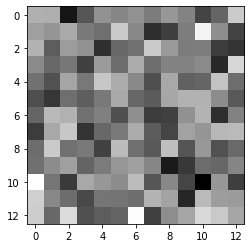

In [14]:
plt.imshow(y[:169,:].reshape((13,13)),'gray')

In [0]:
plt.imshow(y[169:,:].reshape((13,13)),'gray')

ValueError: ignored

In [0]:

def prox_nuclear(A, lambd):
    U, S, Vh = np.linalg.svd(A)
    svp = np.sum(S > lambd)
    if svp >= 1:
        S = S[:svp] - lambd
        X = U[:,:svp] @ np.diag(S) @ Vh[:svp]
        nucnorm = np.sum(S)
    else:
        X = np.zeros(A.shape)
        nucnorm = 0
    return X, nucnorm

In [0]:
def prox_l21(A,lambd):
    X = np.zeros(A.shape)
    for i in range(X.shape[1]):
        nxi = np.linalg.norm(A[:,i])
        if nxi > lambd:
            X[:,i] = (1 - lambd/nxi) * A[:,i]
    return X
    
    

In [0]:

def lrr(y, A, lambd):
    tol = 1e-6
    max_iter = 500
    ro = 1.1
    mu = 1e-4
    max_mu = 1e10

    d, na = y.shape
    _, nb = A.shape
    #X = np.zeros((nb, na))
    X = np.zeros((2*K,N))
    E = np.zeros((d, na))
    J = X

    Y1 = E
    Y2 = X
    AtA = A.T @ A
    Aty = A.T @ y
    I = np.eye(nb)
    invAtAI = np.linalg.inv(AtA + I)

    errs = []
    times = []
    start = time.time()

    for iter in range(max_iter):
      

        J, nuclearnormJ = prox_nuclear(X+Y2/mu, 1/mu)
        E = prox_l21(y - A @ X.reshape((2*K*N,1)) + Y1/mu, lambd/mu)

        X = (invAtAI @ ((A.T @ (Y1/mu -E) + Aty).reshape((2*K,N)) - Y2/mu + J).reshape((2*K*N,1))).reshape((2*K,N))
        dY1 = y - A @ X.reshape((2*K*N,1)) - E
        dY2 = X - J

        Y1 += mu * dY1
        Y2 += mu * dY2
        mu = min(ro*mu, max_mu)
        times.append(time.time() - start)
       
        metric = np.linalg.norm(y - A @ X.reshape((2*K*N,1)))
        print(metric)
        errs.append(metric)
        if metric < tol:
            break
    return J, E, errs, iter, times

In [18]:
Xk, E, errs, iters, times = lrr(y, A, 100)

0.005720094891771966
0.00572629026647902
0.005720160460676527
0.005722256137943627
0.00572099925832095
0.005725513660525187
0.00572094052981204
0.005724942322096647
0.005721671593603808
0.005720954202969873
0.005726196334197406
0.005721378259580178
0.005724349029455254
0.005721486961411533
0.0057193692603599924
0.005725756165054242
0.005721854507554043
0.005724084296872354
0.005724643122661405
0.0057208715997956365
0.005723694590356307
0.005719156600550071
0.005722899868127908
0.005722958209188449
0.005722416803960782
0.005722671677286082
0.005722188687161494
0.005724723507473105
0.005722560478719588
0.005726677542711193
0.005720168285566838
0.005719929796857258
0.0057273592718459845
0.005718964893405417
0.005720014443794955
0.005724179041896127
0.005724795691699624
0.005723537855935222
0.005722655422698301
0.005720101338579302
0.005721939895279871
0.005721420898937734
0.00572298514226183
0.005725443425486086
0.005721913009696547
0.005724183799713798
0.005720229008186132
0.005719990298

In [0]:
u, s, v = np.linalg.svd(Xk)

In [20]:
s

array([3.76055298e+01, 8.86237560e-01, 6.85256111e-01, 5.23375409e-01,
       4.04814788e-01, 3.05958145e-01, 2.79386407e-01, 2.05559708e-01,
       8.44933996e-02, 3.16177840e-02, 4.43726475e-03, 1.09884482e-14,
       3.40507252e-15, 1.78614276e-15, 1.51950260e-15, 1.21353637e-15,
       1.00421928e-15, 8.76576706e-16, 8.31586417e-16, 3.80355121e-16])

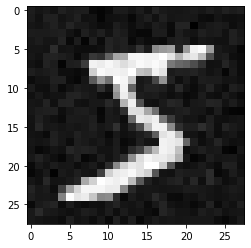

In [22]:

im1 = (v[0,:784]).reshape((28,28))
plt.imshow(im1,'gray')

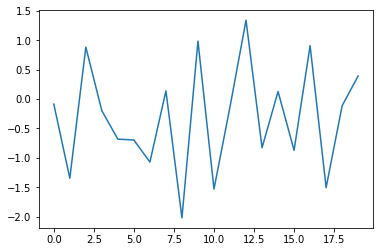

In [23]:

plt.plot(np.vstack((h1,h2)))

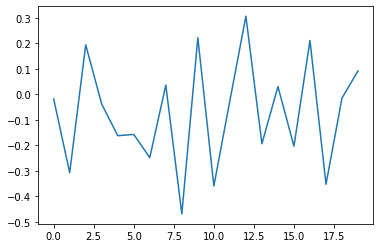

In [25]:
plt.plot(u[:,0])

In [27]:
times

[0.13135886192321777,
 0.2587592601776123,
 0.3809671401977539,
 0.5017087459564209,
 0.6373374462127686,
 0.759427547454834,
 0.8825857639312744,
 1.0033340454101562,
 1.1284773349761963,
 1.2505114078521729,
 1.3724229335784912,
 1.4927351474761963,
 1.6212832927703857,
 1.7511711120605469,
 1.8738036155700684,
 1.9954776763916016,
 2.119680643081665,
 2.2413511276245117,
 2.3645029067993164,
 2.4848713874816895,
 2.6098694801330566,
 2.7354605197906494,
 2.858161687850952,
 2.9795451164245605,
 3.1033973693847656,
 3.2245655059814453,
 3.347647190093994,
 3.4679770469665527,
 3.5910420417785645,
 3.7237608432769775,
 3.847170829772949,
 3.969590902328491,
 4.096637487411499,
 4.222952127456665,
 4.346822500228882,
 4.466139793395996,
 4.586859703063965,
 4.714367151260376,
 4.841886520385742,
 4.963181018829346,
 5.085761785507202,
 5.210058212280273,
 5.333614349365234,
 5.454766511917114,
 5.576072454452515,
 5.700892448425293,
 5.827494859695435,
 5.947657585144043,
 6.0710895061